# 1. 전처리

In [1]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:
# 불용어 로드
stopwords = pd.read_csv('E:\\naver_news\\stopwords.csv', header=None)
stop_words = list(stopwords[0])

In [44]:
# 데이터 로드
news1 = pd.read_csv('E:\\naver_news\\news1.csv', encoding='cp949') # 데이터 손상으로 기본값 utf-8로 인코딩 안됨
news2 = pd.read_csv('E:\\naver_news\\news2.csv')
news3 = pd.read_csv('E:\\naver_news\\news3.csv')
news4 = pd.read_csv('E:\\naver_news\\news4.csv')
news5 = pd.read_csv('E:\\naver_news\\news5.csv')
news6 = pd.read_csv('E:\\naver_news\\news6.csv')
news7 = pd.read_csv('E:\\naver_news\\news7.csv')

C:\Users\roman\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
news2['day'] = news2['1'].str.slice(start=8, stop=10)

In [59]:
news2

,0,1,2
0,늘 믿을 수 없는 좌파 궤변 해명 말돌리기 억지,2020.04.13. 오후 3:59,"1-10 / 6,706건"
1,선별진료소 가면 확진자 접촉했고 증상이 있음에도 불구하고 엑스레이 사진 가지고 오라...,2020.04.13. 오후 3:59,"1-10 / 6,706건"
2,진짜 기자들 너무한다 아니 어떤 의사가 뇌피셜한걸 어떻게 기사화하냐 그의...,2020.04.13. 오후 3:59,"1-10 / 6,706건"
3,열심히 고생하는데 실무자들 의기소침하게 만드는 이런가짜뉴스는 진짜 너무한거다 반성좀...,2020.04.13. 오후 3:59,"1-10 / 6,706건"
4,문죄인 독재정권 온갖 거짓과 여론조작 통계호도 언론장악 믿을수가 없습니다 가짜 뉴스...,2020.04.13. 오후 3:59,"1-10 / 6,706건"
...,...,...,...
139131,김성제 뽑을건데요,2020.04.13. 오후 5:36,"3,491-3,500 / 6,713건"
139132,이소영이 누구냐 처음들어보는데 제 의 송호창 왜 나왔냐 요즘 변호사 돈이안되나,2020.04.13. 오후 5:36,"3,491-3,500 / 6,713건"
139133,이소영 화이팅 거짓 선동에 넘어가는 시민이 아닙니다 추잡하고 저급한 네거티브는 이...,2020.04.13. 오후 5:36,"3,491-3,500 / 6,713건"
139134,그래 서로 싫어하는 후보가 있지 욕할수도 있고 근데 던지거나 목숨을 위협하지마라,2020.04.13. 오후 4:48,"3,491-3,500 / 6,713건"


In [48]:
data_list = [news1, news2, news3, news4, news5, news6, news7]

# 알파벳, 숫자, 특수문자, 자음, 언더바(_) 삭제
for news in data_list:
    news['0'] = news['0'].str.replace(pat='[a-zA-Z0-9\Wㄱ-ㅎ_+]', repl=' ')

In [60]:
# 명사만 추출
news_token_list = []
for news in data_list:
    news_token = []
    for comment in tqdm(news['0']):
        news_token.append(okt.nouns(comment))
    news_token_list.append(news_token)

100%|███████████████████████████████████████████████████████████████████████████| 57897/57897 [06:21<00:00, 151.65it/s]


In [62]:
len(news_token_list[0])

134513

In [63]:
# 불용어 제거
stopped_news_token_list = []
for news_token in news_token_list:
    stopped_news_token = []
    for token in tqdm(news_token):
        stopped_tokens = [i for i in token if not i in stop_words]
        stopped_tokens2 = [i for i in stopped_tokens if len(i)>1]
        stopped_news_token.append(stopped_tokens2)
    stopped_news_token_list.append(stopped_news_token)

100%|██████████████████████████████████████████████████████████████████████████| 57897/57897 [00:06<00:00, 8343.81it/s]


In [68]:
# 토큰화된 리스트를 성분으로 갖는 데이터프레임 생성
token_df_list = []
for i in tqdm(range(len(stopped_news_token_list))):
    token_series = pd.Series(stopped_news_token_list[i])
    token_df = pd.DataFrame(token_series)
    token_df['day'] = data_list[i]['1'].str.slice(start=8, stop=10)
    token_df_list.append(token_df)

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 13.08it/s]


In [72]:
token_df_list[6]

,0,day
0,"[독재, 체제, 나라, 점점]",08
1,"[진짜, 공무원, 공직자, 개혁]",08
2,"[라이, 공무원, 거대, 조직, 개혁, 얍실들]",08
3,"[개혁, 민주당, 조국, 개혁, 미래, 통합, 과반수, 정권, 심판]",08
4,"[먼저, 개혁, 개혁, 쓰레기]",08
...,...,...
57892,[이제],08
57893,"[박주선, 후보, 홍보, 기사]",08
57894,[주서],08
57895,[정치],08


In [73]:
token_df_list[0].to_csv('news1_token.csv', index=False, header=None, encoding='utf-8-sig') # 파일로 저장
token_df_list[1].to_csv('news2_token.csv', index=False, header=None, encoding='utf-8-sig')
token_df_list[2].to_csv('news3_token.csv', index=False, header=None, encoding='utf-8-sig')
token_df_list[3].to_csv('news4_token.csv', index=False, header=None, encoding='utf-8-sig')
token_df_list[4].to_csv('news5_token.csv', index=False, header=None, encoding='utf-8-sig')
token_df_list[5].to_csv('news6_token.csv', index=False, header=None, encoding='utf-8-sig')
token_df_list[6].to_csv('news7_token.csv', index=False, header=None, encoding='utf-8-sig')

In [2]:
# 파일 합치기
news1 = pd.read_csv('E:\\naver_news\\news1_token.csv', header=None)
news2 = pd.read_csv('E:\\naver_news\\news2_token.csv', header=None)
news3 = pd.read_csv('E:\\naver_news\\news3_token.csv', header=None)
news4 = pd.read_csv('E:\\naver_news\\news4_token.csv', header=None)
news5 = pd.read_csv('E:\\naver_news\\news5_token.csv', header=None)
news6 = pd.read_csv('E:\\naver_news\\news6_token.csv', header=None)
news7 = pd.read_csv('E:\\naver_news\\news7_token.csv', header=None)

In [5]:
news = pd.concat([news1, news2, news3, news4, news5, news6, news7])
news

,0,1
0,"['원전', '공든탑', '푸훕']",14
1,"['자유', '침해', '표현', '재산', '이동', '지자', '핑크색', '고...",14
2,"['오늘', '좌빨', '폭정', '민생', '파탄', '대해', '심판', '민주...",14
3,"['공든탑', '지름길']",14
4,"['댓글', '교활']",14
...,...,...
57892,['이제'],8
57893,"['박주선', '후보', '홍보', '기사']",8
57894,['주서'],8
57895,['정치'],8


In [6]:
# 인덱스 초기화
news.reset_index(inplace=True, drop=True)
news

,0,1
0,"['원전', '공든탑', '푸훕']",14
1,"['자유', '침해', '표현', '재산', '이동', '지자', '핑크색', '고...",14
2,"['오늘', '좌빨', '폭정', '민생', '파탄', '대해', '심판', '민주...",14
3,"['공든탑', '지름길']",14
4,"['댓글', '교활']",14
...,...,...
896537,['이제'],8
896538,"['박주선', '후보', '홍보', '기사']",8
896539,['주서'],8
896540,['정치'],8


In [7]:
# 각 성분은 리스트가 아니라 문자열로 인식되므로 대괄호, 따옴표, comma를 모두 없애준다.
news[0] = news[0].str.replace(pat='\W', repl=' ')

In [8]:
news

,0,1
0,원전 공든탑 푸훕,14
1,자유 침해 표현 재산 이동 지자 핑크색 고...,14
2,오늘 좌빨 폭정 민생 파탄 대해 심판 민주...,14
3,공든탑 지름길,14
4,댓글 교활,14
...,...,...
896537,이제,8
896538,박주선 후보 홍보 기사,8
896539,주서,8
896540,정치,8


In [36]:
news.to_csv('news_token.csv', index=False, header=None, encoding='utf-8-sig')

In [10]:
from konlpy.tag import Okt
okt = Okt()

# 전처리 테스트1 (댓글 10,000개)

In [12]:
test_token = []

for comment in tqdm(test):
    test_token.append(okt.nouns(comment))

test_token

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:32<00:00, 304.98it/s]


[['늘', '수', '좌파', '궤변', '해명', '말', '억지'],
 ['선',
  '진료',
  '소',
  '가면',
  '확',
  '진자',
  '접촉',
  '증상',
  '불구',
  '엑스레이',
  '사진',
  '가지',
  '오라',
  '팩트'],
 ['진짜',
  '기자',
  '의사',
  '뇌피셜한걸',
  '기사화',
  '의사',
  '신천지',
  '조사',
  '반대',
  '의사',
  '던데',
  '가짜',
  '뉴스',
  '총선',
  '전이',
  '말',
  '선동',
  '정권',
  '잡',
  '생각'],
 ['고생', '실무', '자', '가짜', '뉴스', '진짜', '반성', '좀', '언론', '선거', '걸'],
 ['문죄인',
  '독재정',
  '온갖',
  '거짓',
  '여론조작',
  '통계',
  '호도',
  '언론',
  '장악',
  '가짜',
  '뉴스',
  '진정',
  '가짜',
  '뉴스',
  '청와대',
  '부패',
  '비리',
  '산실',
  '이건',
  '나라'],
 ['해골',
  '찬',
  '유사',
  '시민',
  '선거',
  '끈',
  '낫다',
  '이겻다',
  '확신',
  '사전투표',
  '거',
  '완료',
  '듯',
  '부정선거',
  '공산당',
  '국민',
  '분노',
  '칼날',
  '공산당',
  '모가지'],
 ['사실',
  '선',
  '진료',
  '소',
  '최근',
  '확',
  '진자',
  '접촉',
  '동선',
  '겹',
  '외국',
  '방문',
  '것',
  '팩트',
  '의사',
  '질문',
  '항생제',
  '처방',
  '그냥',
  '가라',
  '그',
  '와중',
  '엑스레이',
  '도착',
  '허옇',
  '보더',
  '그때',
  '검사',
  '결과',
  '음성',
  '것',
  '유방',
  '선',
  '진료',
  '소',
  '거기',
  '

In [55]:
len(test_token)

10000

In [13]:
stopped_test_token=[]
for token in tqdm(test_token):
    stopped_tokens = [i for i in token if not i in stop_words]
    stopped_tokens2 = [i for i in stopped_tokens if len(i)>1]
    stopped_test_token.append(stopped_tokens2)
    
stopped_test_token

100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 10222.71it/s]


[['좌파', '궤변', '해명', '억지'],
 ['진료', '가면', '진자', '접촉', '증상', '불구', '엑스레이', '사진', '오라', '팩트'],
 ['진짜',
  '기자',
  '의사',
  '뇌피셜한걸',
  '기사화',
  '의사',
  '신천지',
  '조사',
  '반대',
  '의사',
  '던데',
  '가짜',
  '뉴스',
  '총선',
  '전이',
  '선동',
  '정권'],
 ['고생', '실무', '가짜', '뉴스', '진짜', '반성', '언론', '선거'],
 ['문죄인',
  '독재정',
  '온갖',
  '거짓',
  '여론조작',
  '통계',
  '호도',
  '언론',
  '장악',
  '가짜',
  '뉴스',
  '진정',
  '가짜',
  '뉴스',
  '청와대',
  '부패',
  '비리',
  '산실',
  '이건',
  '나라'],
 ['해골',
  '유사',
  '시민',
  '선거',
  '낫다',
  '이겻다',
  '확신',
  '사전투표',
  '완료',
  '부정선거',
  '공산당',
  '국민',
  '분노',
  '칼날',
  '공산당',
  '모가지'],
 ['진료',
  '최근',
  '진자',
  '접촉',
  '동선',
  '외국',
  '방문',
  '팩트',
  '의사',
  '질문',
  '항생제',
  '처방',
  '그냥',
  '가라',
  '와중',
  '엑스레이',
  '도착',
  '허옇',
  '보더',
  '검사',
  '결과',
  '음성',
  '유방',
  '진료',
  '거기',
  '환자',
  '선별',
  '최대한',
  '검사'],
 ['총선', '진자', '폭발', '일본', '올림픽', '연기', '폭증', '사태', '그땐', '촛불'],
 ['폐렴',
  '증상',
  '소견',
  '단서',
  '진자',
  '발생',
  '병원',
  '비용',
  '전가',
  '부분',
  '단서',
  '나중',
  '의료',
  '삭감',

In [25]:
# 토큰화된 리스트를 성분으로 갖는 데이터프레임 생성
token_series = pd.Series(stopped_test_token)
token_df = pd.DataFrame(token_series)
token_df['day'] = news2['1'][0:10000].str.slice(start=8, stop=10)
token_df
# token_df.to_csv('news2_token.txt', index=False, header=None, encoding='utf-8-sig') # 파일로 저장

,0,day
0,"[좌파, 궤변, 해명, 억지]",13
1,"[진료, 가면, 진자, 접촉, 증상, 불구, 엑스레이, 사진, 오라, 팩트]",13
2,"[진짜, 기자, 의사, 뇌피셜한걸, 기사화, 의사, 신천지, 조사, 반대, 의사, ...",13
3,"[고생, 실무, 가짜, 뉴스, 진짜, 반성, 언론, 선거]",13
4,"[문죄인, 독재정, 온갖, 거짓, 여론조작, 통계, 호도, 언론, 장악, 가짜, 뉴...",13
...,...,...
9995,"[고스톱, 어제, 시민, 발언, 민주당, 정의당, 달라, 오늘, 박형준, 발언, 어...",13
9996,"[어르신, 정체, 투표, 참여, 야당, 승리, 확신]",13
9997,"[핑크, 오줌]",13
9998,"[언론, 좌파, 정권, 부역, 위해, 안감, 충성, 경쟁]",13


In [23]:
flatlist=[]

for token in tqdm(stopped_test_token):
    flatlist += token

word_list = pd.Series(flatlist)
word_list

100%|███████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 1429454.02it/s]


0         좌파
1         궤변
2         해명
3         억지
4         진료
        ... 
73495     세력
73496     기회
73497    제대로
73498     정신
73499     인간
Length: 73500, dtype: object

In [27]:
word_list.value_counts()

국민        1110
민주당       1107
선거         828
나라         601
일자리        596
          ... 
나갱           1
대한의사협회       1
꼬락서리         1
수명           1
굴욕           1
Length: 9167, dtype: int64

# 전처리 테스트2 (파일 1개)

In [28]:
news2_token = []
for comment in tqdm(news2['0']):
    news2_token.append(okt.nouns(comment))

100%|█████████████████████████████████████████████████████████████████████████| 139136/139136 [08:51<00:00, 261.80it/s]


In [32]:
stopped_news2_token=[]
for token in tqdm(news2_token):
    stopped_tokens = [i for i in token if not i in stop_words]
    stopped_tokens2 = [i for i in stopped_tokens if len(i)>1]
    stopped_news2_token.append(stopped_tokens2)

100%|███████████████████████████████████████████████████████████████████████| 139136/139136 [00:12<00:00, 10799.42it/s]


In [33]:
flatlist=[]

for token in tqdm(stopped_news2_token):
    flatlist += token

word_list = pd.Series(flatlist)

100%|█████████████████████████████████████████████████████████████████████| 139136/139136 [00:00<00:00, 1483638.15it/s]


국민       0.016300
민주당      0.013048
선거       0.010937
나라       0.007965
정치       0.007368
           ...   
이인권      0.000001
퍼줄것      0.000001
짤수잇슴다    0.000001
주폐쇄      0.000001
흐트려      0.000001
Length: 35653, dtype: float64

In [37]:
word_freq = word_list.value_counts()
word_freq

국민       15667
민주당      12541
선거       10512
나라        7656
정치        7082
         ...  
이인권          1
퍼줄것          1
짤수잇슴다        1
주폐쇄          1
흐트려          1
Length: 35653, dtype: int64

In [45]:
word_freq['황교안']

1805

# 2. 빈도 분석

In [36]:
news = pd.read_csv('E:\\naver_news\\news_token.csv', header=None)
news

,0,1
0,원전 공든탑 푸훕,14
1,자유 침해 표현 재산 이동 지자 핑크색 고...,14
2,오늘 좌빨 폭정 민생 파탄 대해 심판 민주...,14
3,공든탑 지름길,14
4,댓글 교활,14
...,...,...
896537,이제,8
896538,박주선 후보 홍보 기사,8
896539,주서,8
896540,정치,8


In [37]:
# 전체 빈도
flat_list=[]
for token in tqdm(news[0]):
    flat_list += token.split()

100%|██████████████████████████████████████████████████████████████████████| 896542/896542 [00:01<00:00, 708045.94it/s]


In [38]:
word_list = pd.Series(flat_list)
word_list

0           원전
1          공든탑
2           푸훕
3           자유
4           침해
          ... 
6346336     홍보
6346337     기사
6346338     주서
6346339     정치
6346340    나경원
Length: 6346341, dtype: object

In [39]:
word_freq = word_list.value_counts()
word_freq[:20]

국민      100253
민주당      80118
선거       71117
투표       56211
나라       53822
정치       46147
정권       37438
통합       37239
진짜       34017
세월호      32392
막말       30746
문재인      30518
보수       29945
대한민국     29919
코로나      29384
정부       28525
차명진      26488
대통령      25269
인간       25140
후보       24776
dtype: int64

In [44]:
word_freq['차명진']

26488

In [69]:
news[news[1]==8]

,0,1
805093,청와대 주사파 거짓말 요즘,8
805094,총선 승리 코로나 종식 논리 경제 조국 사...,8
805095,스스로 스타 연예매니지먼트 오디션 무대 남사당패 ...,8
805096,번지 입시 비리 정경 시진핑 애완견 조국 ...,8
805097,의료 고생 가로 과오 전형 공산당 수법 도...,8
...,...,...
896537,이제,8
896538,박주선 후보 홍보 기사,8
896539,주서,8
896540,정치,8


In [5]:
news_day = []
for i in range(8,15):
    df = news[news[1]==i]
    df.reset_index(inplace=True, drop=True)
    news_day.append(df)

In [6]:
day_series = []
for i in range(len(news_day)):
    series = news_day[i][0]
    series.name = i+8
    day_series.append(series)

In [7]:
news_by_date = pd.DataFrame(day_series).transpose()
news_by_date

,8,9,10,11,12,13,14
0,청와대 주사파 거짓말 요즘,공직 거래,제발 입방 재앙 우한 코로나바이러스 귀신 확산 ...,통합 공감 민주당 비공,이건 격리 원칙 감염 보호 위함 이탈 투표...,좌파 궤변 해명 억지,원전 공든탑 푸훕
1,총선 승리 코로나 종식 논리 경제 조국 사...,민주당,확진 사망 모범 대만 홍콩 싱가폴 베트남 ...,사전투표 일부러,투표 사무 안전 보장,진료 가면 진자 접촉 증상 불구 엑스레이 ...,자유 침해 표현 재산 이동 지자 핑크색 고...
2,스스로 스타 연예매니지먼트 오디션 무대 남사당패 ...,투표 국민 주인 개돼지 취급 정치 세력 응...,투표 역대 최고 이대 의미 출국금지 재앙 ...,역시 대한민국 국민 국민 우한 코로나 재앙 ...,재앙 피해 생가 투표 가세 국가부도,진짜 기자 의사 뇌피셜한걸 기사화 의사 신천지 ...,오늘 좌빨 폭정 민생 파탄 대해 심판 민주...
3,번지 입시 비리 정경 시진핑 애완견 조국 ...,민주당,자꾸 종식 증가 별명 재앙 제발 아시아 국...,불의 조국 정의 조국 비상 식이 상식 지배...,진짜 가지가지 거리 두기 의미 자가 격리 ...,고생 실무 가짜 뉴스 진짜 반성 언론 선거,공든탑 지름길
4,의료 고생 가로 과오 전형 공산당 수법 도...,금태섭 탈락 민주당 민주당 금태섭 의원 민주당 ...,총선 거리 두기,위선 조국 처벌 제일 간사 체질 구역질,중앙 권력 지방 권력 지방의회 민주당 차지 ...,문죄인 독재정 온갖 거짓 여론조작 통계 호도 ...,댓글 교활
...,...,...,...,...,...,...,...
156977,NaN,NaN,NaN,선거 자주 래야 선거,NaN,NaN,NaN
156978,NaN,NaN,NaN,나라 보수,NaN,NaN,NaN
156979,NaN,NaN,NaN,우한 폐렴 피해 투표 미리,NaN,NaN,NaN
156980,NaN,NaN,NaN,보수 지지자 여론 조작,NaN,NaN,NaN


In [8]:
flat_list = []
for i in range(8,15):
    flat = []
    for token in tqdm(news_by_date[i]):
        try:
            flat += token.split()
        except:
            continue
    flat_list.append(flat)

100%|██████████████████████████████████████████████████████████████████████| 156982/156982 [00:00<00:00, 709514.57it/s]


In [13]:
pd.Series(flat_list[0]).value_counts()

국민     9289
민주당    7840
선거     5874
나라     5487
정치     4528
       ... 
퉁가리       1
한명인       1
똥머        1
고진        1
안그랫       1
Length: 29350, dtype: int64

In [17]:
counts_list=[]
for i in range(7):
    counts_series = pd.Series(flat_list[i]).value_counts()
    counts_series.name = i+8
    counts_list.append(counts_series)

In [19]:
counts_list[0]

국민     9289
민주당    7840
선거     5874
나라     5487
정치     4528
       ... 
퉁가리       1
한명인       1
똥머        1
고진        1
안그랫       1
Name: 8, Length: 29350, dtype: int64

In [21]:
counts_df = pd.DataFrame(counts_list).transpose()

In [24]:
counts_df

,8,9,10,11,12,13,14
국민,9289.0,9550.0,13383.0,18707.0,15449.0,15667.0,18208.0
민주당,7840.0,10065.0,12971.0,14173.0,11955.0,12541.0,10573.0
선거,5874.0,8914.0,11455.0,11818.0,9715.0,10512.0,12829.0
나라,5487.0,5210.0,8565.0,9890.0,7554.0,7656.0,9460.0
정치,4528.0,4823.0,5577.0,10401.0,8275.0,7082.0,5461.0
...,...,...,...,...,...,...,...
나은뇸,NaN,NaN,NaN,NaN,NaN,NaN,1.0
시노펙,NaN,NaN,NaN,NaN,NaN,NaN,1.0
닉넴,NaN,NaN,NaN,NaN,NaN,NaN,1.0
메레스,NaN,NaN,NaN,NaN,NaN,NaN,1.0


# 3. 연관어 분석

In [3]:
news = pd.read_csv('E:\\naver_news\\news_token.csv', header=None)
news

,0,1
0,원전 공든탑 푸훕,14
1,자유 침해 표현 재산 이동 지자 핑크색 고...,14
2,오늘 좌빨 폭정 민생 파탄 대해 심판 민주...,14
3,공든탑 지름길,14
4,댓글 교활,14
...,...,...
896537,이제,8
896538,박주선 후보 홍보 기사,8
896539,주서,8
896540,정치,8


In [4]:
# 각 댓글들을 리스트로 변환
flat_list=[]
for token in tqdm(news[0]):
    flat_list.append(token.split())

100%|██████████████████████████████████████████████████████████████████████| 896542/896542 [00:02<00:00, 444089.30it/s]


In [7]:
flat_list[:5]

[['원전', '공든탑', '푸훕'],
 ['자유', '침해', '표현', '재산', '이동', '지자', '핑크색', '고무장갑', '설거지', '얼른'],
 ['오늘',
  '좌빨',
  '폭정',
  '민생',
  '파탄',
  '대해',
  '심판',
  '민주당',
  '거짓',
  '사기',
  '위선',
  '대가',
  '치룰',
  '투표',
  '투표'],
 ['공든탑', '지름길'],
 ['댓글', '교활']]

In [5]:
lee = []
hwang = []
for comment in tqdm(flat_list):
    if '이낙연' in comment and '황교안' not in comment:
        lee.append(comment)
        
for comment in tqdm(flat_list):
    if '황교안' in comment and '이낙연' not in comment:
        hwang.append(comment)

100%|█████████████████████████████████████████████████████████████████████| 896542/896542 [00:00<00:00, 2055239.91it/s]


In [6]:
count_lee = {}
obj = '이낙연'
for i in tqdm(lee):
    comment = set(i)
    comment.remove(obj)
    for a in list(comment):
        count_lee[obj,a] = count_lee.get((obj,a),0) + 1

100%|██████████████████████████████████████████████████████████████████████████| 4476/4476 [00:00<00:00, 131722.19it/s]


In [67]:
count_lee

{('이낙연', '구도'): 12,
 ('이낙연', '박원순'): 54,
 ('이낙연', '굳이'): 9,
 ('이낙연', '북쪽'): 1,
 ('이낙연', '대구'): 59,
 ('이낙연', '불보듯'): 3,
 ('이낙연', '얼굴'): 45,
 ('이낙연', '대가'): 10,
 ('이낙연', '홍준표'): 43,
 ('이낙연', '국민'): 393,
 ('이낙연', '수준'): 43,
 ('이낙연', '물레방아'): 1,
 ('이낙연', '고요'): 3,
 ('이낙연', '아무'): 12,
 ('이낙연', '야권'): 5,
 ('이낙연', '선동'): 50,
 ('이낙연', '한번'): 57,
 ('이낙연', '대권'): 111,
 ('이낙연', '꼽으라'): 1,
 ('이낙연', '소견'): 1,
 ('이낙연', '이재명'): 126,
 ('이낙연', '대다수'): 6,
 ('이낙연', '기자'): 38,
 ('이낙연', '맹목'): 3,
 ('이낙연', '가세'): 5,
 ('이낙연', '지지'): 149,
 ('이낙연', '뉴시스'): 1,
 ('이낙연', '막말'): 67,
 ('이낙연', '김경수'): 19,
 ('이낙연', '임종석'): 83,
 ('이낙연', '노무현'): 24,
 ('이낙연', '주자'): 48,
 ('이낙연', '대통령'): 382,
 ('이낙연', '지층'): 7,
 ('이낙연', '뭔가'): 26,
 ('이낙연', '크게'): 11,
 ('이낙연', '포섭'): 2,
 ('이낙연', '도전'): 8,
 ('이낙연', '주목'): 2,
 ('이낙연', '바램'): 1,
 ('이낙연', '차기'): 120,
 ('이낙연', '전면'): 1,
 ('이낙연', '적극'): 9,
 ('이낙연', '기대'): 13,
 ('이낙연', '유력'): 4,
 ('이낙연', '끝물'): 1,
 ('이낙연', '참전'): 1,
 ('이낙연', '매우'): 10,
 ('이낙연', '시장'): 24,
 ('이낙연', '보아'): 6,
 ('이

In [7]:
count_hwang = {}
obj = '황교안'
for i in tqdm(hwang):
    comment = set(i)
    comment.remove(obj)
    for a in list(comment):
        count_hwang[obj,a] = count_hwang.get((obj,a),0) + 1

100%|████████████████████████████████████████████████████████████████████████| 12445/12445 [00:00<00:00, 140816.42it/s]


In [9]:
df_lee = pd.DataFrame.from_dict(count_lee, orient='index')
df_lee

,0
"(이낙연, 야권)",5
"(이낙연, 고요)",3
"(이낙연, 대가)",10
"(이낙연, 굳이)",9
"(이낙연, 수준)",43
...,...
"(이낙연, 해묵)",1
"(이낙연, 속인)",1
"(이낙연, 비례대표)",1
"(이낙연, 수행원)",1


In [10]:
df_lee_sort = df_lee.sort_values(by=[0], ascending=False)
df_lee_sort[:20]

,0
"(이낙연, 민주당)",520
"(이낙연, 후보)",414
"(이낙연, 국민)",393
"(이낙연, 문재인)",387
"(이낙연, 대통령)",382
"(이낙연, 종로)",366
"(이낙연, 아들)",323
"(이낙연, 조국)",303
"(이낙연, 유시민)",270
"(이낙연, 선거)",268


In [11]:
df_hwang = pd.DataFrame.from_dict(count_hwang, orient='index')
df_hwang_sort = df_hwang.sort_values(by=[0], ascending=False)
df_hwang_sort[:20]

,0
"(황교안, 김종인)",2096
"(황교안, 차명진)",1667
"(황교안, 대표)",1649
"(황교안, 통합)",1424
"(황교안, 선거)",1372
"(황교안, 국민)",1277
"(황교안, 보수)",1130
"(황교안, 민주당)",1078
"(황교안, 후보)",867
"(황교안, 막말)",845


# 4. 연관어 감성 분석

In [12]:
list1 = []
for i in tqdm(range(len(df_lee_sort))):
    list1.append([df_lee_sort.index[i][1], df_lee_sort[0][i]])

df2_lee_sort = pd.DataFrame(list1, columns=['term', 'freq'])

100%|███████████████████████████████████████████████████████████████████████████| 6943/6943 [00:00<00:00, 33808.66it/s]


In [13]:
df2_lee_sort

,term,freq
0,민주당,520
1,후보,414
2,국민,393
3,문재인,387
4,대통령,382
...,...,...
6938,성인,1
6939,막대기,1
6940,우등,1
6941,방관,1


In [14]:
NRC = pd.read_csv('E:\\naver_news\\NRC-Emotion-Lexicon.csv', encoding='cp949')
NRC

,Korean,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,허풍,0,0,0,0,0,0,0,0,0,0
1,주판,0,0,0,0,0,0,0,0,0,1
2,버리다,0,1,0,0,0,1,0,1,0,0
3,버려진,0,1,1,0,0,1,0,1,0,0
4,포기,0,1,1,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
14177,존,0,0,0,0,0,0,0,0,0,0
14178,동물원,0,0,0,0,0,0,0,0,0,0
14179,동물학의,0,0,0,0,0,0,0,0,0,0
14180,동물학,0,0,0,0,0,0,0,0,0,0


In [15]:
NRC['pos_score'] = NRC['Positive'] + NRC['Anticipation'] + NRC['Joy'] + NRC['Surprise'] + NRC['Trust']
NRC['neg_score'] = NRC['Negative'] + NRC['Anger'] + NRC['Disgust'] + NRC['Fear'] + NRC['Sadness']
NRC_score = pd.DataFrame(zip(NRC['Korean'], NRC['pos_score']-NRC['neg_score']), columns=['Korean', 'score'])
NRC_score

,Korean,score
0,허풍,0
1,주판,1
2,버리다,-3
3,버려진,-4
4,포기,-3
...,...,...
14177,존,0
14178,동물원,0
14179,동물학의,0
14180,동물학,0


In [18]:
lee_match_words = [x for x in df2_lee_sort['term'] if x in list(NRC_score['Korean'])]
lee_match_words

['대통령',
 '아들',
 '선거',
 '정치',
 '코로나',
 '지지',
 '인간',
 '경제',
 '투표',
 '정부',
 '재앙',
 '대표',
 '교활',
 '심판',
 '보수',
 '지도자',
 '지역',
 '미래',
 '인물',
 '승리',
 '조작',
 '중국',
 '위선',
 '시민',
 '이유',
 '공작',
 '결과',
 '대구',
 '응원',
 '정책',
 '민족',
 '의사',
 '지원',
 '정신',
 '선동',
 '계속',
 '국가',
 '뉴스',
 '기회',
 '상대',
 '거짓말',
 '위원장',
 '얼굴',
 '사건',
 '댓글',
 '불법',
 '가짜',
 '능력',
 '사회주의',
 '장관',
 '책임',
 '진보',
 '이용',
 '인사',
 '관리',
 '조사',
 '기자',
 '후보자',
 '마음',
 '기사',
 '마스크',
 '최고',
 '처음',
 '위반',
 '무시',
 '목소리',
 '정의',
 '가장',
 '포기',
 '바보',
 '제일',
 '머리',
 '완전',
 '거리',
 '일본',
 '이야기',
 '방송',
 '관련',
 '현실',
 '행동',
 '자유',
 '민주주의',
 '걱정',
 '느낌',
 '세계',
 '비교',
 '선택',
 '사과',
 '반대',
 '겸손',
 '축하',
 '차이',
 '완화',
 '영광',
 '인상',
 '오늘',
 '이해',
 '돼지',
 '관계',
 '시장',
 '부동산',
 '선전',
 '새끼',
 '싸움',
 '집단',
 '잘못',
 '중도',
 '주민',
 '이름',
 '준비',
 '개입',
 '상황',
 '공산주의',
 '교환',
 '판단',
 '여권',
 '인기',
 '헛소리',
 '그릇',
 '거지',
 '옹호',
 '무능',
 '양심',
 '믿음',
 '육군',
 '위기',
 '해결',
 '부정',
 '투기',
 '도움',
 '기름',
 '주택',
 '발표',
 '항상',
 '탄핵',
 '의미',
 '혁신',
 '비난',
 '정경',
 '존경',
 '관

In [42]:
score_series = []
for x in lee_match_words:
    score_series.append(NRC_score[NRC_score['Korean'] == x])

In [51]:
lee_score = pd.concat(score_series, axis=0)
lee_score

,Korean,score
9686,대통령,2
11726,아들,0
4151,선거,0
9475,정치,-1
2793,코로나,0
...,...,...
5361,텅빈,0
13557,텅빈,-2
4269,잠식,-2
226,성인,0


In [50]:
NRC_score[NRC_score['Korean'] == '텅빈']

,Korean,score
5361,텅빈,0
13557,텅빈,-2


In [59]:
freq_series = []
for x in lee_score['Korean']:
    freq_series.append(df2_lee_sort[df2_lee_sort['term'] == x])

In [60]:
lee_freq = pd.concat(freq_series, axis=0)
lee_freq

,term,freq
4,대통령,382
6,아들,323
9,선거,268
13,정치,196
14,코로나,194
...,...,...
6923,텅빈,1
6923,텅빈,1
6933,잠식,1
6938,성인,1


In [62]:
lee_score.reset_index(inplace=True, drop=True)
lee_freq.reset_index(inplace=True, drop=True)

lee_score['freq'] = lee_freq['freq']
lee_score

,Korean,score,freq
0,대통령,2,382
1,아들,0,323
2,선거,0,268
3,정치,-1,196
4,코로나,0,194
...,...,...,...
2418,텅빈,0,1
2419,텅빈,-2,1
2420,잠식,-2,1
2421,성인,0,1


In [63]:
lee_score['total_score'] = lee_score['score'] * lee_score['freq']
lee_score

,Korean,score,freq,total_score
0,대통령,2,382,764
1,아들,0,323,0
2,선거,0,268,0
3,정치,-1,196,-196
4,코로나,0,194,0
...,...,...,...,...
2418,텅빈,0,1,0
2419,텅빈,-2,1,-2
2420,잠식,-2,1,-2
2421,성인,0,1,0


# 5. 토픽 모델링

In [2]:
import gensim

In [3]:
news = pd.read_csv('E:\\naver_news\\news_token.csv', header=None)
news

,0,1
0,원전 공든탑 푸훕,14
1,자유 침해 표현 재산 이동 지자 핑크색 고...,14
2,오늘 좌빨 폭정 민생 파탄 대해 심판 민주...,14
3,공든탑 지름길,14
4,댓글 교활,14
...,...,...
896537,이제,8
896538,박주선 후보 홍보 기사,8
896539,주서,8
896540,정치,8


In [4]:
news_list = [x.split() for x in news[0]]

In [5]:
news_list

[['원전', '공든탑', '푸훕'],
 ['자유', '침해', '표현', '재산', '이동', '지자', '핑크색', '고무장갑', '설거지', '얼른'],
 ['오늘',
  '좌빨',
  '폭정',
  '민생',
  '파탄',
  '대해',
  '심판',
  '민주당',
  '거짓',
  '사기',
  '위선',
  '대가',
  '치룰',
  '투표',
  '투표'],
 ['공든탑', '지름길'],
 ['댓글', '교활'],
 ['오발탄', '연합뉴스', '제대', '로잔'],
 ['매국노', '댓글', '로라', '보구', '통합', '보고'],
 ['그동안', '행태', '볼때', '나라', '대한민국', '민주당', '정말', '민주당'],
 ['개헌', '독재', '시작'],
 ['참전', '기분', '참전', '공산주의', '중하', '타도'],
 ['재앙', '심판'],
 ['원전', '공든탑'],
 ['한일전', '선거', '왜놈'],
 ['경기도', '지사', '보고', '보수', '간다', '남자', '구분', '큰일', '보수당', '당선', '이나라', '시기'],
 ['원전', '이건', '백지'],
 ['지역구', '미리'],
 ['민주당', '망처', '국민', '바보'],
 ['활시위', '크게', '폭풍', '정권', '집권', '폭풍', '국민', '역사', '독재', '발전', '대한민국', '국민'],
 ['사전투표',
  '투표소',
  '개방',
  '지난번',
  '투표',
  '소가',
  '창문',
  '현관문',
  '투표',
  '밀폐',
  '공간',
  '창문',
  '비말',
  '좀해'],
 ['컴퓨터', '조작', '분류기', '컴퓨터', '화일'],
 ['미래', '쪽박', '차라'],
 ['매일',
  '좌파',
  '우파',
  '어쩌구',
  '박살',
  '혁명',
  '각오',
  '국가',
  '혁명',
  '배당금',
  '허경영',
  '경제',
  '공중부양',
  '간다'],
 [

In [6]:
dictionary = gensim.corpora.Dictionary(news_list)

In [7]:
dictionary.token2id

{'공든탑': 0,
 '원전': 1,
 '푸훕': 2,
 '고무장갑': 3,
 '설거지': 4,
 '얼른': 5,
 '이동': 6,
 '자유': 7,
 '재산': 8,
 '지자': 9,
 '침해': 10,
 '표현': 11,
 '핑크색': 12,
 '거짓': 13,
 '대가': 14,
 '대해': 15,
 '민생': 16,
 '민주당': 17,
 '사기': 18,
 '심판': 19,
 '오늘': 20,
 '위선': 21,
 '좌빨': 22,
 '치룰': 23,
 '투표': 24,
 '파탄': 25,
 '폭정': 26,
 '지름길': 27,
 '교활': 28,
 '댓글': 29,
 '로잔': 30,
 '연합뉴스': 31,
 '오발탄': 32,
 '제대': 33,
 '로라': 34,
 '매국노': 35,
 '보고': 36,
 '보구': 37,
 '통합': 38,
 '그동안': 39,
 '나라': 40,
 '대한민국': 41,
 '볼때': 42,
 '정말': 43,
 '행태': 44,
 '개헌': 45,
 '독재': 46,
 '시작': 47,
 '공산주의': 48,
 '기분': 49,
 '중하': 50,
 '참전': 51,
 '타도': 52,
 '재앙': 53,
 '선거': 54,
 '왜놈': 55,
 '한일전': 56,
 '간다': 57,
 '경기도': 58,
 '구분': 59,
 '남자': 60,
 '당선': 61,
 '보수': 62,
 '보수당': 63,
 '시기': 64,
 '이나라': 65,
 '지사': 66,
 '큰일': 67,
 '백지': 68,
 '이건': 69,
 '미리': 70,
 '지역구': 71,
 '국민': 72,
 '망처': 73,
 '바보': 74,
 '발전': 75,
 '역사': 76,
 '정권': 77,
 '집권': 78,
 '크게': 79,
 '폭풍': 80,
 '활시위': 81,
 '개방': 82,
 '공간': 83,
 '밀폐': 84,
 '비말': 85,
 '사전투표': 86,
 '소가': 87,
 '좀해': 88,
 '지난번':

In [11]:
len(dictionary.token2id)

88013

In [8]:
corpus = [dictionary.doc2bow(comment) for comment in tqdm(news_list)]

100%|██████████████████████████████████████████████████████████████████████| 896542/896542 [00:08<00:00, 104887.52it/s]


In [9]:
corpus

[[(0, 1), (1, 1), (2, 1)],
 [(3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1)],
 [(13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 2),
  (25, 1),
  (26, 1)],
 [(0, 1), (27, 1)],
 [(28, 1), (29, 1)],
 [(30, 1), (31, 1), (32, 1), (33, 1)],
 [(29, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1)],
 [(17, 2), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1)],
 [(45, 1), (46, 1), (47, 1)],
 [(48, 1), (49, 1), (50, 1), (51, 2), (52, 1)],
 [(19, 1), (53, 1)],
 [(0, 1), (1, 1)],
 [(54, 1), (55, 1), (56, 1)],
 [(36, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1)],
 [(1, 1), (68, 1), (69, 1)],
 [(70, 1), (71, 1)],
 [(17, 1), (72, 1), (73, 1), (74, 1)],
 [(41, 1),
  (46, 1),
  (72, 2),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 2),
  (81, 1)],
 [(24, 2),
  (82, 1),
  (83, 1

In [10]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=15, id2word=dictionary)

In [15]:
ldamodel.print_topics(num_words=30)

[(0,
  '0.101*"보수" + 0.086*"국회의원" + 0.083*"대통령" + 0.042*"시민" + 0.034*"진보" + 0.031*"자식" + 0.029*"출신" + 0.025*"능력" + 0.021*"친일" + 0.021*"기회" + 0.020*"한당" + 0.020*"좌빨" + 0.015*"끼리" + 0.015*"자리" + 0.015*"팔이" + 0.014*"꼴통" + 0.014*"라이" + 0.013*"이재명" + 0.011*"부모" + 0.011*"래야" + 0.010*"노무현" + 0.010*"타령" + 0.009*"만하" + 0.009*"웃기" + 0.009*"임종석" + 0.008*"철수" + 0.008*"존경" + 0.008*"국정" + 0.008*"회사" + 0.008*"눈치"'),
 (1,
  '0.063*"기사" + 0.045*"누가" + 0.036*"지역" + 0.036*"댓글" + 0.033*"역시" + 0.030*"지지율" + 0.027*"만원" + 0.026*"보고" + 0.025*"기자" + 0.020*"이해" + 0.020*"라면" + 0.019*"머리" + 0.019*"조선일보" + 0.016*"세상" + 0.015*"일이" + 0.013*"자체" + 0.013*"원래" + 0.012*"확인" + 0.012*"네이버" + 0.010*"오늘" + 0.010*"신문" + 0.009*"행위" + 0.008*"실제" + 0.008*"금지" + 0.008*"기본" + 0.007*"진중권" + 0.007*"전체" + 0.007*"수도" + 0.007*"아치" + 0.006*"민경욱"'),
 (2,
  '0.114*"국민" + 0.074*"정치" + 0.065*"진짜" + 0.054*"인간" + 0.044*"수준" + 0.042*"세금" + 0.027*"정신" + 0.026*"정치인" + 0.024*"나라" + 0.024*"안철수" + 0.021*"국민의당" + 0.020*"개돼지" + 0.019*"저런" + 0.016*"고

## 5.1 perplexity & coherence

In [11]:
perplexity_values = []
for i in tqdm(range(2,10)):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    perplexity_values.append(ldamodel.log_perplexity(corpus))
    
x = range(2,10)
plt.plot(x, perplexity_values)
plt.show()

100%|█████████████████████████████████████████████████████████████████████████████████| 8/8 [1:14:57<00:00, 562.23s/it]


NameError: name 'plt' is not defined

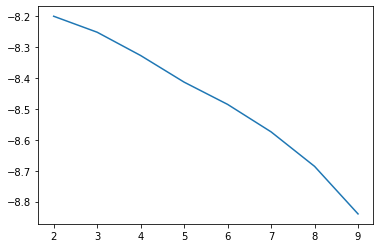

In [12]:
import matplotlib.pyplot as plt

x = range(2,10)
plt.plot(x, perplexity_values)
plt.show()

100%|███████████████████████████████████████████████████████████████████████████████| 10/10 [1:27:10<00:00, 523.02s/it]


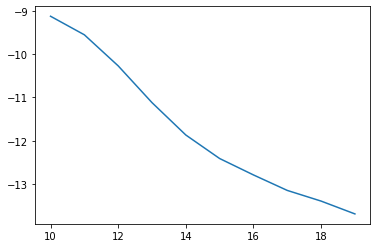

In [7]:
perplexity_values = []
for i in tqdm(range(10,20)):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    perplexity_values.append(ldamodel.log_perplexity(corpus))
    
x = range(10,20)
plt.plot(x, perplexity_values)
plt.show()

100%|███████████████████████████████████████████████████████████████████████████████| 10/10 [1:24:53<00:00, 509.36s/it]


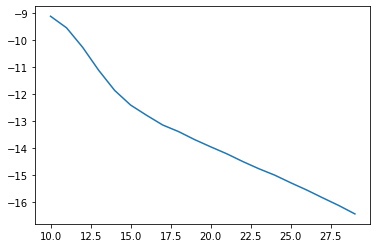

In [8]:
for i in tqdm(range(20,30)):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    perplexity_values.append(ldamodel.log_perplexity(corpus))
    
x = range(10,30)
plt.plot(x, perplexity_values)
plt.show()

100%|███████████████████████████████████████████████████████████████████████████████| 10/10 [1:27:46<00:00, 526.67s/it]


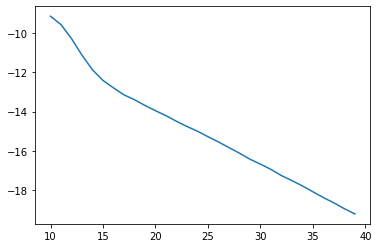

In [9]:
for i in tqdm(range(30,40)):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    perplexity_values.append(ldamodel.log_perplexity(corpus))
    
x = range(10,40)
plt.plot(x, perplexity_values)
plt.show()

100%|███████████████████████████████████████████████████████████████████████████████| 30/30 [5:20:37<00:00, 641.24s/it]


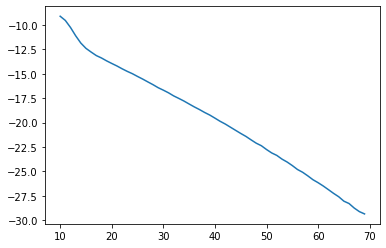

In [10]:
for i in tqdm(range(40,70)):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    perplexity_values.append(ldamodel.log_perplexity(corpus))
    
x = range(10,70)
plt.plot(x, perplexity_values)
plt.show()

100%|███████████████████████████████████████████████████████████████████████████████| 10/10 [1:31:51<00:00, 551.15s/it]


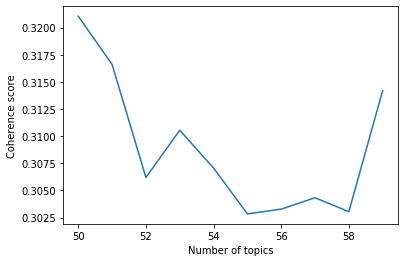

In [14]:
from gensim.models import CoherenceModel

coherence_values = []
for i in tqdm(range(50,60)):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=news_list, dictionary=dictionary, topn=20)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

x = range(50,60)
plt.plot(x, coherence_values)
plt.xlabel("Number of topics")
plt.ylabel("Coherence score")
plt.show()

100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [40:04<00:00, 300.55s/it]


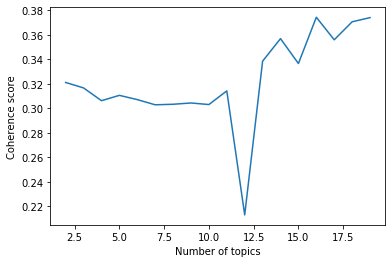

In [20]:
for i in tqdm(range(2,10)):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=news_list, dictionary=dictionary, topn=20)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

x = range(2,20)
plt.plot(x, coherence_values)
plt.xlabel("Number of topics")
plt.ylabel("Coherence score")
plt.show()

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [55:50<00:00, 335.06s/it]


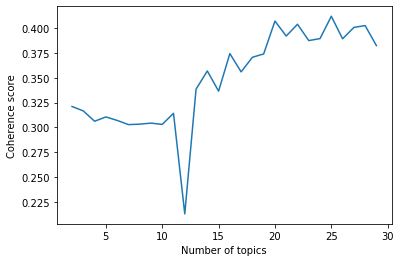

In [21]:
for i in tqdm(range(10,20)):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=news_list, dictionary=dictionary, topn=20)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

x = range(2,30)
plt.plot(x, coherence_values)
plt.xlabel("Number of topics")
plt.ylabel("Coherence score")
plt.show()

100%|███████████████████████████████████████████████████████████████████████████████| 10/10 [1:07:15<00:00, 403.51s/it]


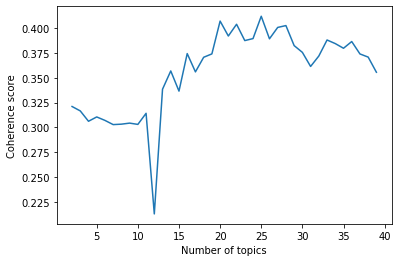

In [22]:
for i in tqdm(range(20,30)):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=news_list, dictionary=dictionary, topn=20)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

x = range(2,40)
plt.plot(x, coherence_values)
plt.xlabel("Number of topics")
plt.ylabel("Coherence score")
plt.show()

In [24]:
pd.Series(coherence_values)

0     0.321052
1     0.316604
2     0.306185
3     0.310545
4     0.307059
5     0.302831
6     0.303273
7     0.304322
8     0.303036
9     0.314194
10    0.212936
11    0.338462
12    0.356830
13    0.336527
14    0.374306
15    0.355901
16    0.370590
17    0.374000
18    0.407022
19    0.391993
20    0.403820
21    0.387396
22    0.389400
23    0.411892
24    0.389192
25    0.400633
26    0.402495
27    0.382335
28    0.375536
29    0.361358
30    0.371863
31    0.387996
32    0.384364
33    0.379673
34    0.386429
35    0.373942
36    0.370769
37    0.355520
dtype: float64

## topic number = 15